# Task 5 

Assign:
- engagement score to each user. 
Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)


In [1]:
# Load the data
from src.utils import fetch_data_from_db_table

df = fetch_data_from_db_table('clean_data')

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance

# Select only the columns with experience metrics
experience_metrics = ['Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
df_experience = df[experience_metrics]

# Handle missing values if any
df_experience = df_experience.dropna()

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_experience)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_scaled)
# Convert df_scaled back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_experience.columns)

# Add the cluster labels to the original DataFrame
df_experience['cluster'] = kmeans.labels_

# Identify the less engaged cluster
# This could be the cluster with the lowest average 'Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', and 'Avg Bearer TP UL (kbps)'
# For example, if cluster 0 is the less engaged cluster
less_engaged_cluster = 0

# Get the centroid of the less engaged cluster
less_engaged_centroid = kmeans.cluster_centers_[less_engaged_cluster]

# Calculate the Euclidean distance between each user data point and the centroid of the less engaged cluster
df_experience['engagement_score'] = df_scaled.apply(lambda x: distance.euclidean(x, less_engaged_centroid), axis=1)

# Print the DataFrame with the engagement scores
print(df_experience)

           Dur. (ms)  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0       7.060759e-03        -0.188482    -2.279256e-01   
1       7.060759e-03         0.731606    -2.279256e-01   
2       7.060759e-03         0.000000    -4.744955e-16   
3       7.060759e-03         0.000000    -4.744955e-16   
4       7.060759e-03         0.000000    -4.744955e-16   
...              ...              ...              ...   
149996 -9.072880e-02        -0.756899    -2.142365e+00   
149997  2.062895e-01        -1.109733    -9.685318e-01   
149998  2.107973e-01        -0.139113    -6.322041e-02   
149999  2.053184e-01        -0.453938    -2.279256e-01   
150000  2.815807e-15         0.000000    -4.744955e-16   

        Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  cluster  \
0                     -0.960585                -0.733343        0   
1                     -1.068281                -0.979640        0   
2                     -1.345392                -1.458541        0   
3                     -0.76

# Task 5.1 (b)

Task 5. 1 - Write a python program to assign:
engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)
experience score to each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience’s cluster. 


In [3]:
# Identify the worst experience cluster
# This could be the cluster with the highest average 'Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', and 'Avg Bearer TP UL (kbps)'
# For example, if cluster 2 is the worst experience cluster
worst_experience_cluster = 2

# Get the centroid of the worst experience cluster
worst_experience_centroid = kmeans.cluster_centers_[worst_experience_cluster]

# Calculate the Euclidean distance between each user data point and the centroid of the worst experience cluster
df_experience['experience_score'] = df_scaled.apply(lambda x: distance.euclidean(x, worst_experience_centroid), axis=1)

# Print the DataFrame with the experience scores
print(df_experience)

           Dur. (ms)  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0       7.060759e-03        -0.188482    -2.279256e-01   
1       7.060759e-03         0.731606    -2.279256e-01   
2       7.060759e-03         0.000000    -4.744955e-16   
3       7.060759e-03         0.000000    -4.744955e-16   
4       7.060759e-03         0.000000    -4.744955e-16   
...              ...              ...              ...   
149996 -9.072880e-02        -0.756899    -2.142365e+00   
149997  2.062895e-01        -1.109733    -9.685318e-01   
149998  2.107973e-01        -0.139113    -6.322041e-02   
149999  2.053184e-01        -0.453938    -2.279256e-01   
150000  2.815807e-15         0.000000    -4.744955e-16   

        Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  cluster  \
0                     -0.960585                -0.733343        0   
1                     -1.068281                -0.979640        0   
2                     -1.345392                -1.458541        0   
3                     -0.76

# Task 5.2

Task 5.2 - Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer

In [4]:
# Calculate the satisfaction score as the average of the engagement score and the experience score
df_experience['satisfaction_score'] = (df_experience['engagement_score'] + df_experience['experience_score']) / 2

# Sort the DataFrame by the satisfaction score in descending order
df_sorted = df_experience.sort_values(by='satisfaction_score', ascending=False)

# Select the top 10 rows
top_10_satisfied_customers = df_sorted.head(10)

# Print the top 10 satisfied customers
print(top_10_satisfied_customers)

       Dur. (ms)  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
17471  -2.070616         3.336521        -0.968532                -1.450475   
21624  -2.594953        -1.440765        -1.401759                -1.953115   
18203  -2.368905         3.090830        -2.142365                -0.757401   
14089  -2.329163         3.326826         3.260076                 0.339484   
98481  -2.113444         3.317087        -1.401759                -0.674420   
16917  -2.556401        -2.598237        -1.401759                -0.973876   
16988  -1.797518         0.000000         3.260076                -1.610010   
25962   1.996281        -2.929269        -2.142365                -0.639958   
9364   -1.363441         3.257707         3.475105                 1.476779   
14253  -1.850515        -1.942443        -0.968532                -1.953115   

       Avg Bearer TP UL (kbps)  cluster  engagement_score  experience_score  \
17471                -2.234540        0          4.

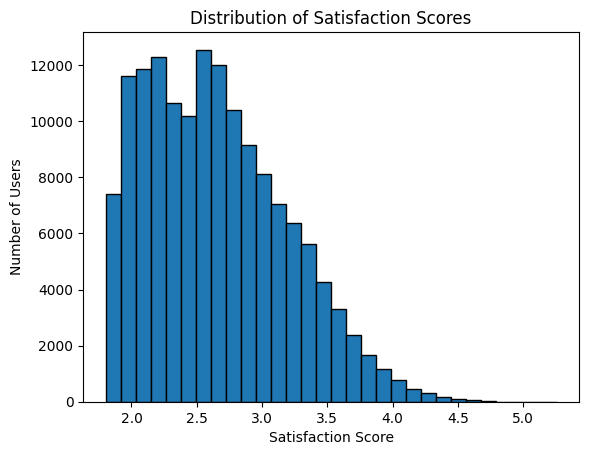

In [5]:
# Visualize the distribution of satisfaction scores
import matplotlib.pyplot as plt

# Plot a histogram of the satisfaction scores
plt.hist(df_experience['satisfaction_score'], bins=30, edgecolor='black')
plt.title('Distribution of Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Users')
plt.show()


In [6]:
# Identify the top 10 satisfied customers
top_10_satisfied_customers = df_experience.nlargest(10, 'satisfaction_score')

# Print the top 10 satisfied customers
print(top_10_satisfied_customers)


       Dur. (ms)  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
17471  -2.070616         3.336521        -0.968532                -1.450475   
21624  -2.594953        -1.440765        -1.401759                -1.953115   
18203  -2.368905         3.090830        -2.142365                -0.757401   
14089  -2.329163         3.326826         3.260076                 0.339484   
98481  -2.113444         3.317087        -1.401759                -0.674420   
16917  -2.556401        -2.598237        -1.401759                -0.973876   
16988  -1.797518         0.000000         3.260076                -1.610010   
25962   1.996281        -2.929269        -2.142365                -0.639958   
9364   -1.363441         3.257707         3.475105                 1.476779   
14253  -1.850515        -1.942443        -0.968532                -1.953115   

       Avg Bearer TP UL (kbps)  cluster  engagement_score  experience_score  \
17471                -2.234540        0          4.

# Task 5.3

Regression model to predict the satisfaction score of a user based on the engagement score and experience score.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into features (engagement score and experience score) and target (satisfaction score)
X = df_experience[['engagement_score', 'experience_score']]
y = df_experience['satisfaction_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print('Mean Squared Error:', mse)


Mean Squared Error: 9.490485635794992e-31


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into features (engagement score and experience score) and target (satisfaction score)
X = df_experience[['engagement_score', 'experience_score']]
y = df_experience['satisfaction_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print('Mean Squared Error:', mse)

Mean Squared Error: 1.0691772920442492e-05


###  Histogram plot the satisfaction scores to visualize the distribution of scores among your users.

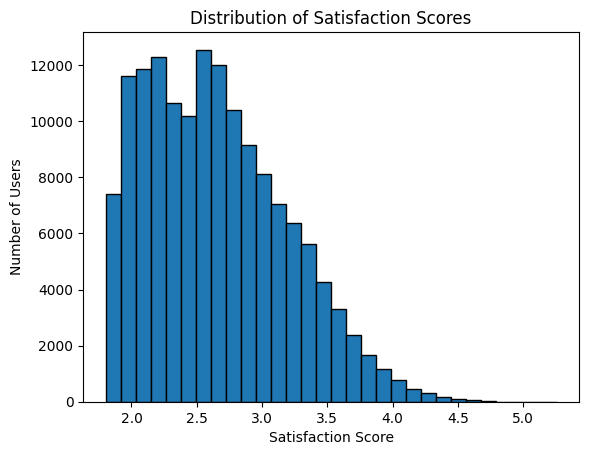

In [9]:
import matplotlib.pyplot as plt

# Plot a histogram of the satisfaction scores
plt.hist(df_experience['satisfaction_score'], bins=30, edgecolor='black')
plt.title('Distribution of Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Users')
plt.show()

# Task 5.4

Task 5.4 - Run a k-means (k=2) on the engagement & the experience score . 

In [10]:
#  Run a k-means clustering with k=2 on the engagement score and experience score

# Select the engagement score and experience score columns
df_scores = df_experience[['engagement_score', 'experience_score']]
# Scale the data
scaler = StandardScaler()
df_scores_scaled = scaler.fit_transform(df_scores)

# Perform k-means clustering with k=2
kmeans_scores = KMeans(n_clusters=2, random_state=0)
kmeans_scores.fit(df_scores_scaled)

# Convert df_scores_scaled back to a DataFrame
df_scores_scaled = pd.DataFrame(df_scores_scaled, columns=df_scores.columns)

# Add the cluster labels to the original DataFrame
df_scores['cluster'] = kmeans_scores.labels_

# Print the DataFrame with the cluster labels
print(df_scores)


        engagement_score  experience_score  cluster
0               0.484878          3.511269        0
1               1.208938          3.517030        0
2               1.130408          4.048710        0
3               0.676883          3.230676        0
4               1.130408          4.048710        0
...                  ...               ...      ...
149996          1.808016          4.682720        0
149997          0.959648          4.240841        0
149998          0.472522          3.298688        0
149999          0.320074          3.597257        0
150000          1.281167          2.391102        0

[150001 rows x 3 columns]


/tmp/ipykernel_32641/3414618918.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scores['cluster'] = kmeans_scores.labels_


In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select the engagement score and experience score columns
df_scores = df_experience[['engagement_score', 'experience_score']]

# Scale the data
scaler = StandardScaler()
df_scores_scaled = scaler.fit_transform(df_scores)

# Perform k-means clustering with k=2
kmeans_scores = KMeans(n_clusters=2, random_state=0)
kmeans_scores.fit(df_scores_scaled)

# Convert df_scores_scaled back to a DataFrame
df_scores_scaled = pd.DataFrame(df_scores_scaled, columns=df_scores.columns)

# Add the cluster labels to the original DataFrame
df_scores['cluster'] = kmeans_scores.labels_

# Print the DataFrame with the cluster labels
print(df_scores)

        engagement_score  experience_score  cluster
0               0.484878          3.511269        0
1               1.208938          3.517030        0
2               1.130408          4.048710        0
3               0.676883          3.230676        0
4               1.130408          4.048710        0
...                  ...               ...      ...
149996          1.808016          4.682720        0
149997          0.959648          4.240841        0
149998          0.472522          3.298688        0
149999          0.320074          3.597257        0
150000          1.281167          2.391102        0

[150001 rows x 3 columns]


/tmp/ipykernel_32641/2401069162.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scores['cluster'] = kmeans_scores.labels_


# Task 5.5

Task 5.5 - Aggregate the average satisfaction & experience score per cluster. 


In [12]:
# Calculate the satisfaction score as the average of the engagement score and the experience score
df_experience['satisfaction_score'] = (df_experience['engagement_score'] + df_experience['experience_score']) / 2

# Aggregate the average satisfaction and experience score per cluster
average_scores = df_experience.groupby('cluster')[['satisfaction_score', 'experience_score']].mean()

# Print the average scores
print(average_scores)


         satisfaction_score  experience_score
cluster                                      
0                  2.580275          3.839972
1                  2.817126          2.583230
2                  2.683053          1.465506


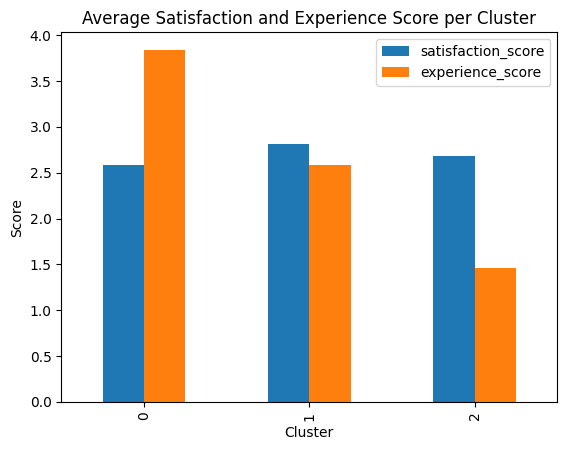

In [13]:
# Plot the average satisfaction and experience score per cluster
import matplotlib.pyplot as plt

# Plot the average satisfaction and experience score per cluster
average_scores.plot(kind='bar')
plt.title('Average Satisfaction and Experience Score per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Score')
plt.show()


### Visualize the clusters in a 2D plot with the engagement score on the x-axis and the experience score on the y-axis.

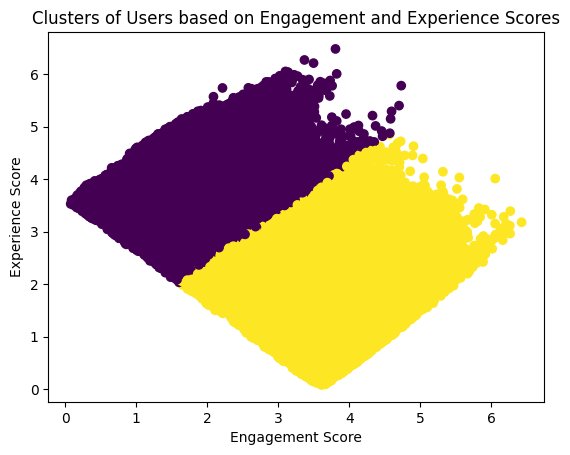

In [14]:
import matplotlib.pyplot as plt

# Plot the clusters in a 2D plot with the engagement score on the x-axis and the experience score on the y-axis
plt.scatter(df_scores['engagement_score'], df_scores['experience_score'], c=df_scores['cluster'], cmap='viridis')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('Clusters of Users based on Engagement and Experience Scores')
plt.show()

In [15]:

from sklearn.model_selection import cross_val_score

# Initialize the model
model = LinearRegression()

# Use cross_val_score function on the model and the data
# cv parameter indicates the number of folds
# scoring parameter indicates the performance measure
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# The scores will be negative as it is a convention in sklearn for error/loss metrics
# Therefore, you need to negate the scores
mse_scores = -scores

# Print the mean squared error for each fold
print('Mean Squared Error for each fold:', mse_scores)

# Print the mean of the mean squared error scores
print('Mean of Mean Squared Error:', mse_scores.mean())

Mean Squared Error for each fold: [3.84908561e-30 2.88995577e-30 4.86276870e-31 2.77890059e-30
 2.93170295e-31]
Mean of Mean Squared Error: 2.0594778279009733e-30


# Export the data to a CSV file

In [16]:
# Export the DataFrame with the engagement, experience, and satisfaction scores to a CSV file
from src.utils import export_to_csv


In [17]:

export_to_csv(df_experience, 'user_satisfaction_scores.csv')